In [2]:
import subprocess
from subprocess import Popen
import sys
import pandas as pd
import matplotlib.pyplot as plt
import argparse
import statistics
import mplhep as hep
#cudapath = '/data2/user/pfudolig/pixeltrack-standalone/results/cuda_results/'

In [3]:
#change as needed
user_output = pd.read_csv('results/alpc_results/csv/alpc_g2_pin1_disNone_20s_20000e.csv')
title = '3alpc_g2_pin1_disNone_20s_20000e'

In [4]:
def plotAveThroughput(dataframe,gpu):
    #Plot average throughput as a function of amount of streams
    df_streams = dataframe['nStreams']
    df_throughput = dataframe['throughput']
    #streams_pick = [df_streams[0],df_streams[1],df_streams[3],df_streams[7],df_streams[11],df_streams[15],df_streams[19]]
    thru_std = dataframe['tput_std']
    #std_pick = [thru_std[0],thru_std[1],thru_std[3],thru_std[7],thru_std[11],thru_std[15],thru_std[19]]
    thru_ave = dataframe['tput_ave']
    #ave_pick = [thru_ave[0],thru_ave[1],thru_ave[3],thru_ave[7],thru_ave[11],thru_ave[15],thru_ave[19]]
    events_val = dataframe['nEvents'].iat[0]

    
    plt.style.use(hep.style.CMS)
    plt.figure(figsize = (20,10))
    plt.plot([], [], ' ', label="GPU - " + gpu)
    plt.plot(df_streams,thru_ave,'ro-',linestyle='solid',label='Alpaka Cuda')
    plt.legend(loc='lower right',fontsize='xx-small',frameon=True,shadow=True)
    plt.xticks(df_streams,fontsize=20)
    plt.errorbar(df_streams,thru_ave,yerr=thru_std,fmt='r',ecolor='k',capsize=7, elinewidth=2,markeredgewidth=1)
    plt.xlabel('Number of Threads/Streams',fontsize=20)
    plt.ylabel('Throughput (events/s)',fontsize=20) 
    plt.title('PixelTrack-Standalone Performance',fontsize=30) 
    plt.savefig('results/alpc_results/png/' + title + '.png')
    plt.show()  

/tmp/ipykernel_533/819582882.py:16: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "ro-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(df_streams,thru_ave,'ro-',linestyle='solid',label='Alpaka Cuda')


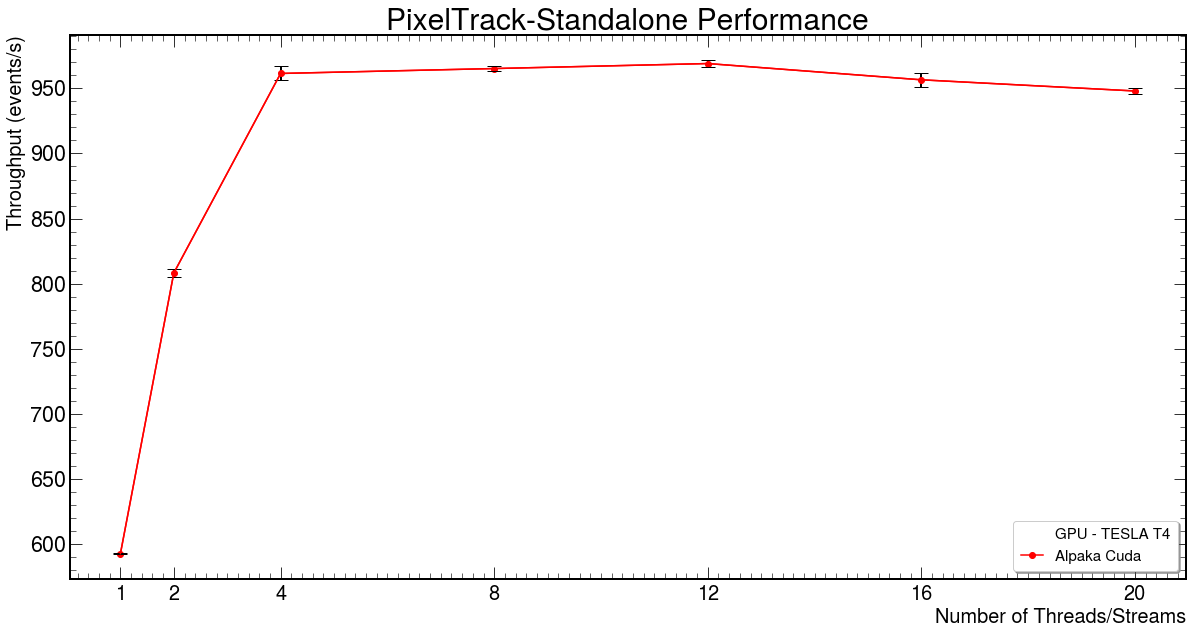

In [5]:
plotAveThroughput(user_output,"TESLA T4")